#  <span style="color:#3D6AF2; text-align: center;"> **LigthGBM Regressor**</span>

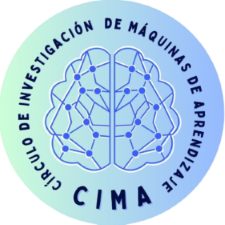

### <span style="color:#486CD9; text-align: center;">**Alumno**: Carrasco Castañeda Edwar Frank</span>

LightGBM, abreviatura de Light Gradient Boosting Machine, es un algoritmo de aprendizaje automático diseñado para abordar tareas de clasificación y regresión. Se destaca por su rapidez y eficiencia, permitiéndole procesar grandes cantidades de datos y múltiples características de manera más ágil que otros modelos. Gracias a estas ventajas, es una opción ideal para aplicaciones que requieren procesamiento en tiempo real.

##  <span style="color:#3D6AF2; text-align: center;">Caso de estudio</span>

Este conjunto de datos proporciona una descripción detallada de las rutinas de ejercicio, los atributos físicos y las métricas de condición física de los miembros del gimnasio. Contiene 973 muestras de datos del gimnasio, incluidos indicadores clave de rendimiento como la frecuencia cardíaca, las calorías quemadas y la duración del entrenamiento. Cada entrada también incluye datos demográficos y niveles de experiencia, lo que permite un análisis exhaustivo de los patrones de condición física, la progresión de los atletas y las tendencias de salud.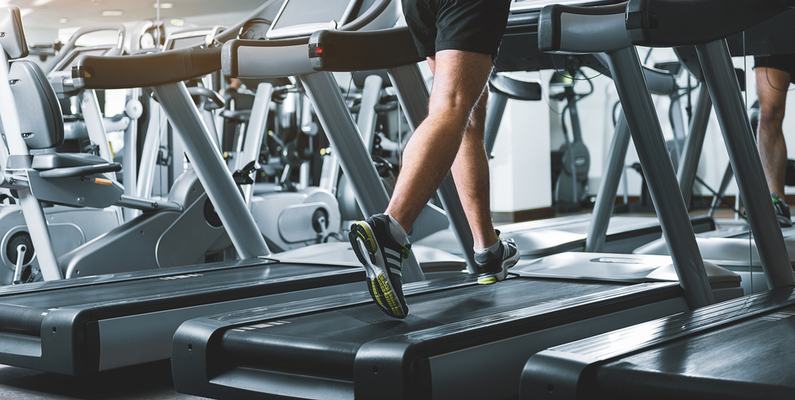


Características principales:

- **Edad**: Edad del miembro del gimnasio.
- **Género**: Género del miembro del gimnasio (Hombre o Mujer).
- **Peso** (kg): Peso del socio en kilogramos.
- **Altura** (m): Altura del miembro en metros.
- **Max_BPM**: Frecuencia cardíaca máxima (latidos por minuto) durante las sesiones de entrenamiento.
- **Avg_BPM**: Frecuencia cardíaca media durante las sesiones de entrenamiento.
- **Resting_BPM**: Frecuencia cardíaca en reposo antes del entrenamiento.
- **Session_Duration** (horas): Duración de cada sesión de entrenamiento en horas.
- **Calories_Burned**: Total de calorías quemadas durante cada sesión.
- **Workout_Type**: Tipo de entrenamiento realizado (por ejemplo, cardio, fuerza, yoga, HIIT).
- **Fat_Percentage**: Porcentaje de grasa corporal del miembro.
- **Water_Intake** (litros): Ingesta diaria de agua durante los entrenamientos.
- **Workout_Frequency** (días/semana): Número de sesiones de entrenamiento por semana.
- **Experience_Level**: Nivel de experiencia, desde principiante (1) hasta experto (3).
- **IMC**(TARGET)🚨: Índice de Masa Corporal, calculado a partir de la altura y el peso.


**PROBLEMATICA**:


La problemática se centra en **identificar** a las personas que están en condiciones no recomendadas según la métrica de *IMC ajustado*. Estas condiciones están relacionadas con un mayor riesgo de problemas de salud, incluyendo **enfermedades cardiovasculares y metabólicas**. El análisis nos permite detectar a los individuos que podrían estar en riesgo y tomar medidas preventivas para mejorar su salud.


**OBJETIVOS**:

*   Evaluar la precisión del modelo mediante el Error Cuadrático Medio. (MSE)
*   Analizar la capacidad explicativa del modelo usando el Coeficiente de Determinación. (R²)

*   Generar predicciones para nuevos individuos con base en el modelo desarrollado



**ANTECEDENTES**:

En este análisis, hemos utilizado la fórmula del IMC ajustado para evaluar las condiciones de salud de los miembros del gimnasio. La fórmula utilizada es la siguiente:
$$
\text{IMC ajustado} = \frac{\text{BMI}}{1 + 0.02 \times (\text{Fat\_Percentage} - 20)}
$$
Descripción del Cálculo
BMI (Índice de Masa Corporal): Es una medida que se calcula a partir del peso y la altura de una persona. La fórmula del BMI es:
$$
\text{BMI} = \frac{\text{Peso (kg)}}{\text{Altura (m)}^2}
$$
Fat_Percentage (Porcentaje de Grasa Corporal): Es el porcentaje de grasa corporal de un individuo.
La fórmula del IMC ajustado toma en cuenta el BMI y lo ajusta según el porcentaje de grasa corporal. Este ajuste se realiza para obtener una medida más precisa del estado de salud de una persona, considerando que un mayor porcentaje de grasa corporal puede indicar un mayor riesgo de problemas de salud, incluso si el BMI está dentro de un rango normal.
Variables Utilizadas
BMI: Calculado a partir del peso y la altura del miembro del gimnasio.
Fat_Percentage: Porcentaje de grasa corporal del miembro.
Importancia del Cálculo
El IMC ajustado nos permite identificar a las personas que están en condiciones no recomendadas, lo que está relacionado con un mayor riesgo de problemas de salud, incluyendo enfermedades cardiovasculares y metabólicas. Este análisis es crucial para detectar a los individuos que podrían estar en riesgo y tomar medidas preventivas para mejorar su salud.



| IMC Ajustado | Clasificación                     | Descripción                                                   |
|--------------|-----------------------------------|---------------------------------------------------------------|
| < 18.5       | Bajo peso                         | Puede indicar desnutrición o bajo porcentaje de grasa.        |
| 18.5 - 22.9  | Peso normal bajo                  | Saludable, pero con menor porcentaje de grasa o masa muscular.|
| 23 - 26.9    | Peso normal alto                  | Rango saludable con mayor cantidad de músculo o grasa.        |
| 27 - 29.9    | Sobrepeso leve                    | Exceso de grasa o músculo, pero sin llegar a obesidad.        |
| 30 - 34.9    | Obesidad grado 1 (moderada)       | Riesgo moderado de enfermedades metabólicas.                  |
| 35 - 39.9    | Obesidad grado 2 (severa)         | Mayor riesgo de enfermedades cardiovasculares y metabólicas.  |
| ≥ 40         | Obesidad grado 3 (mórbida)        | Riesgo extremo, requiere intervención médica.                 |


**LECTURA DE DATOS**:

En este código, estamos utilizando la librería kagglehub para descargar el conjunto de datos "gym-members-exercise-dataset" desde Kaggle. Una vez descargado, cargamos el archivo gym_members_exercise_tracking.csv en un DataFrame de pandas para facilitar su manipulación y análisis

In [85]:
import kagglehub
import pandas as pd

# conjunto de datos ruta de la web
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")

# Cargar el conjunto de datos, fijarse el nombre del archivo descargado y pasarlo en formato data frame
data = pd.read_csv(path + '/gym_members_exercise_tracking.csv')

# Mostrar las primeras filas del DataFrame
print(data.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

[Datos disponibles aquí](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-1921-2020-160k-tracks/data)

**PREPROCESAMIENTO**:

En este código, estamos verificando la presencia de **valores nulos** en el conjunto de datos cargado en el DataFrame data. Utilizamos el método isnull() de pandas para identificar las celdas que contienen valores nulos y luego aplicamos sum() para contar el número total de valores nulos en cada columna. Esto nos permite detectar cualquier dato faltante en el conjunto de datos, lo cual es crucial para asegurar la calidad y la integridad de los datos antes de proceder con el análisis.

In [86]:
# Verificar valores nulos
print(data.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


En este código, estamos revisando si hay **filas duplicadas** en el conjunto de datos cargado en el DataFrame data. Utilizamos el método duplicated() de pandas para identificar las filas que se repiten y luego mostramos estas filas duplicadas

In [87]:
# Verificar si hay filas duplicadas en el objeto data
duplicated_rows = data[data.duplicated(keep=False)]

# Mostrar las filas duplicadas
print(duplicated_rows)

Empty DataFrame
Columns: [Age, Gender, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Workout_Type, Fat_Percentage, Water_Intake (liters), Workout_Frequency (days/week), Experience_Level, BMI]
Index: []


**Creacion de variable**:
Vamos a crear nuestra variable ajustada que utiliza IMC y porcentaje de grasa, recordar que vamos utilizar la expresiòn ya planteada en **antecentes**

In [88]:
# Crear una nueva columna llamada "IMC ajustado" en el objeto data
data['IMC ajustado'] = data.apply(lambda row: row['BMI'] / (1 + 0.02 * (row['Fat_Percentage'] - 20)), axis=1)

# Guardar el nuevo DataFrame en un nuevo objeto llamado "dataNew"
dataNew = data

# Mostrar las primeras filas del nuevo DataFrame
print(dataNew.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

En este código, estamos definiendo nuestro target para identificar a las personas que están en condiciones de salud no recomendadas según la métrica de IMC ajustado. Específicamente, consideramos que las personas con un IMC ajustado menor a 19 o mayor a 28 están en un rango asociado a problemas de salud, como enfermedades cardiovasculares y metabólicas. Por lo tanto, estas personas serán marcadas como "éxito" en nuestro análisis.

Para lograr esto, creamos una nueva columna llamada "icm_dico" en el DataFrame dataNew. Esta columna asigna un valor de 0 a las personas cuyo IMC ajustado está entre 19 y 28 (considerado saludable) y un valor de 1 a aquellas cuyo IMC ajustado está fuera de este rango (considerado no saludable). Esto nos permite identificar fácilmente a los individuos que podrían estar en riesgo y tomar medidas preventivas para mejorar su salud

In [89]:
# Crear una nueva columna llamada "icm_dico" en el objeto dataNew
dataNew['icm_dico'] = dataNew['IMC ajustado'].apply(lambda x: 0 if 19 <= x <= 28 else 1)

# Mostrar las primeras filas del nuevo DataFrame con la columna "icm_dico"
print(dataNew.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

**ANÁL**ISIS:


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

**Label Encoding**:

 permite convertir variables categóricas en valores numéricos dentro de una misma columna, lo que lo hace más eficiente que crear múltiples columnas con variables dummy. Sin embargo, es recomendable guardar los diccionarios de mapeo que muestran cómo se realizó la conversión. Esto facilita la interpretación de los datos codificados y evita confusiones al analizarlos o revertir los cambios si es necesario.


In [91]:
# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Codificar columnas categóricas
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Workout_Type'] = label_encoder.fit_transform(data['Workout_Type'])

# Imprimir el DataFrame codificado
print(data)

# Imprimir el significado de cada valor codificado para Gender y Workout_Type
gender_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
workout_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Gender Mapping:", gender_mapping)
print("Workout Type Mapping:", workout_type_mapping)

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1         88.3        1.71      180      157           60   
1     46       0         74.9        1.53      179      151           66   
2     32       0         68.1        1.66      167      122           54   
3     25       1         53.2        1.70      190      164           56   
4     38       1         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24       1         87.1        1.74      187      158           67   
969   25       1         66.6        1.61      184      166           56   
970   59       0         60.4        1.76      194      120           53   
971   32       1        126.4        1.83      198      146           62   
972   46       1         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0      

**LightGBM**:

Este código utiliza LightGBM, un modelo de aprendizaje automático, para predecir el IMC ajustado en función de otras variables. Primero, se seleccionan las características del conjunto de datos y se dividen en entrenamiento (70%) y prueba (30%). Luego, se crea un conjunto de datos específico para LightGBM y se ajustan los hiperparámetros mediante una búsqueda en cuadrícula (GridSearchCV), optimizando el rendimiento del modelo. Finalmente, se entrena el mejor modelo encontrado y se realizan predicciones sobre los datos de prueba.

In [113]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score

# Asegúrate de que el objeto 'data' ya esté cargado en tu entorno

# Definir características (todas menos las columnas 11, 12 y 13) y objetivo (columna 12)
X = data.drop(columns=['BMI', 'IMC ajustado', 'icm_dico'])
y = data['IMC ajustado']

# Dividir los datos en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un dataset de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Definir la cuadrícula de parámetros para el ajuste de hiperparámetros
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

# Inicializar el modelo LightGBM
model = lgb.LGBMRegressor()

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo de la búsqueda en cuadrícula
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)



Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [114]:
# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Obtener la importancia de las variables
importance = best_model.feature_importances_
feature_names = X.columns
# Crear un DataFrame con la importancia de las variables
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nImportancia de las variables:")
print(importance_df)

Mean Squared Error: 0.7896748575821747
R-squared: 0.9849870716754141

Importancia de las variables:
                          Feature  Importance
2                     Weight (kg)        1178
3                      Height (m)         730
10                 Fat_Percentage         689
8                 Calories_Burned         319
5                         Avg_BPM         288
7        Session_Duration (hours)         288
4                         Max_BPM         265
0                             Age         254
6                     Resting_BPM         188
11          Water_Intake (liters)          98
9                    Workout_Type          68
12  Workout_Frequency (days/week)          42
13               Experience_Level          25
1                          Gender          18


El Mean Squared Error (MSE) obtenido es 0.79, lo que indica que las predicciones del modelo son bastante precisas, ya que los valores del IMC ajustado están en un rango de 20 a 40 y los errores son relativamente pequeños.

El R² de 0.98 sugiere que el modelo explica casi toda la variabilidad de la variable objetivo, lo que refuerza su efectividad.

En cuanto a la importancia de las variables, el peso y la altura son los factores más determinantes en la predicción del IMC, lo que tiene sentido dado que el IMC se calcula a partir de estas dos medidas. El porcentaje de grasa corporal, las calorías quemadas y la frecuencia cardíaca también influyen en menor medida, reflejando cómo el metabolismo y la actividad física afectan la composición corporal.

Variables como ingesta de agua, tipo de entrenamiento y nivel de experiencia tienen menor peso en la predicción, lo que sugiere que su impacto en el IMC ajustado es más indirecto o menos significativo en comparación con las variables fisiológicas clave.


**Predicción para un nuevo individuo**:

In [115]:
input_data = {
    'Weight (kg)': 75,
    'Height (m)': 1.71,
    'Fat_Percentage': 20.5,
    'Calories_Burned': 532,
    'Avg_BPM': 160,
    'Session_Duration (hours)': 1.5,
    'Max_BPM': 180,
    'Age': 30,
    'Resting_BPM': 60,
    'Water_Intake (liters)': 2.2,
    'Workout_Type': 1,
    'Workout_Frequency (days/week)': 3,
    'Experience_Level': 2,
    'Gender': 0
}

input_df = pd.DataFrame([input_data])

input_df = input_df[X.columns]

# Predecir con los valores dados
prediction = best_model.predict(input_df)

print(f"Predicción con los valores dados: {prediction[0]}")

Predicción con los valores dados: 24.02523287523179


**Resumen**:

Este estudio utilizó datos de un gimnasio para predecir con alta precisión el IMC ajustado de los usuarios. Los resultados indican que el modelo creado presenta un error muy bajo (MSE = 0.79) y un R² de 0.98, lo que refleja su gran fiabilidad.

Las principales variables que influyen en la predicción del IMC son el peso y la altura, seguidas por el porcentaje de grasa corporal, las calorías quemadas y la frecuencia cardíaca. Esto subraya la relevancia de monitorear estos factores para optimizar la salud y el rendimiento físico.

Aunque factores como la ingesta de agua, el tipo de entrenamiento y la experiencia en el gimnasio tienen un impacto menor en el IMC, continúan siendo importantes para el bienestar general. Este análisis resalta cómo un enfoque basado en datos permite comprender mejor cómo los hábitos afectan la composición corporal, lo que facilita la toma de decisiones hacia una vida más saludable.

**HACER EJERCICIOS SE HA DICHO!**

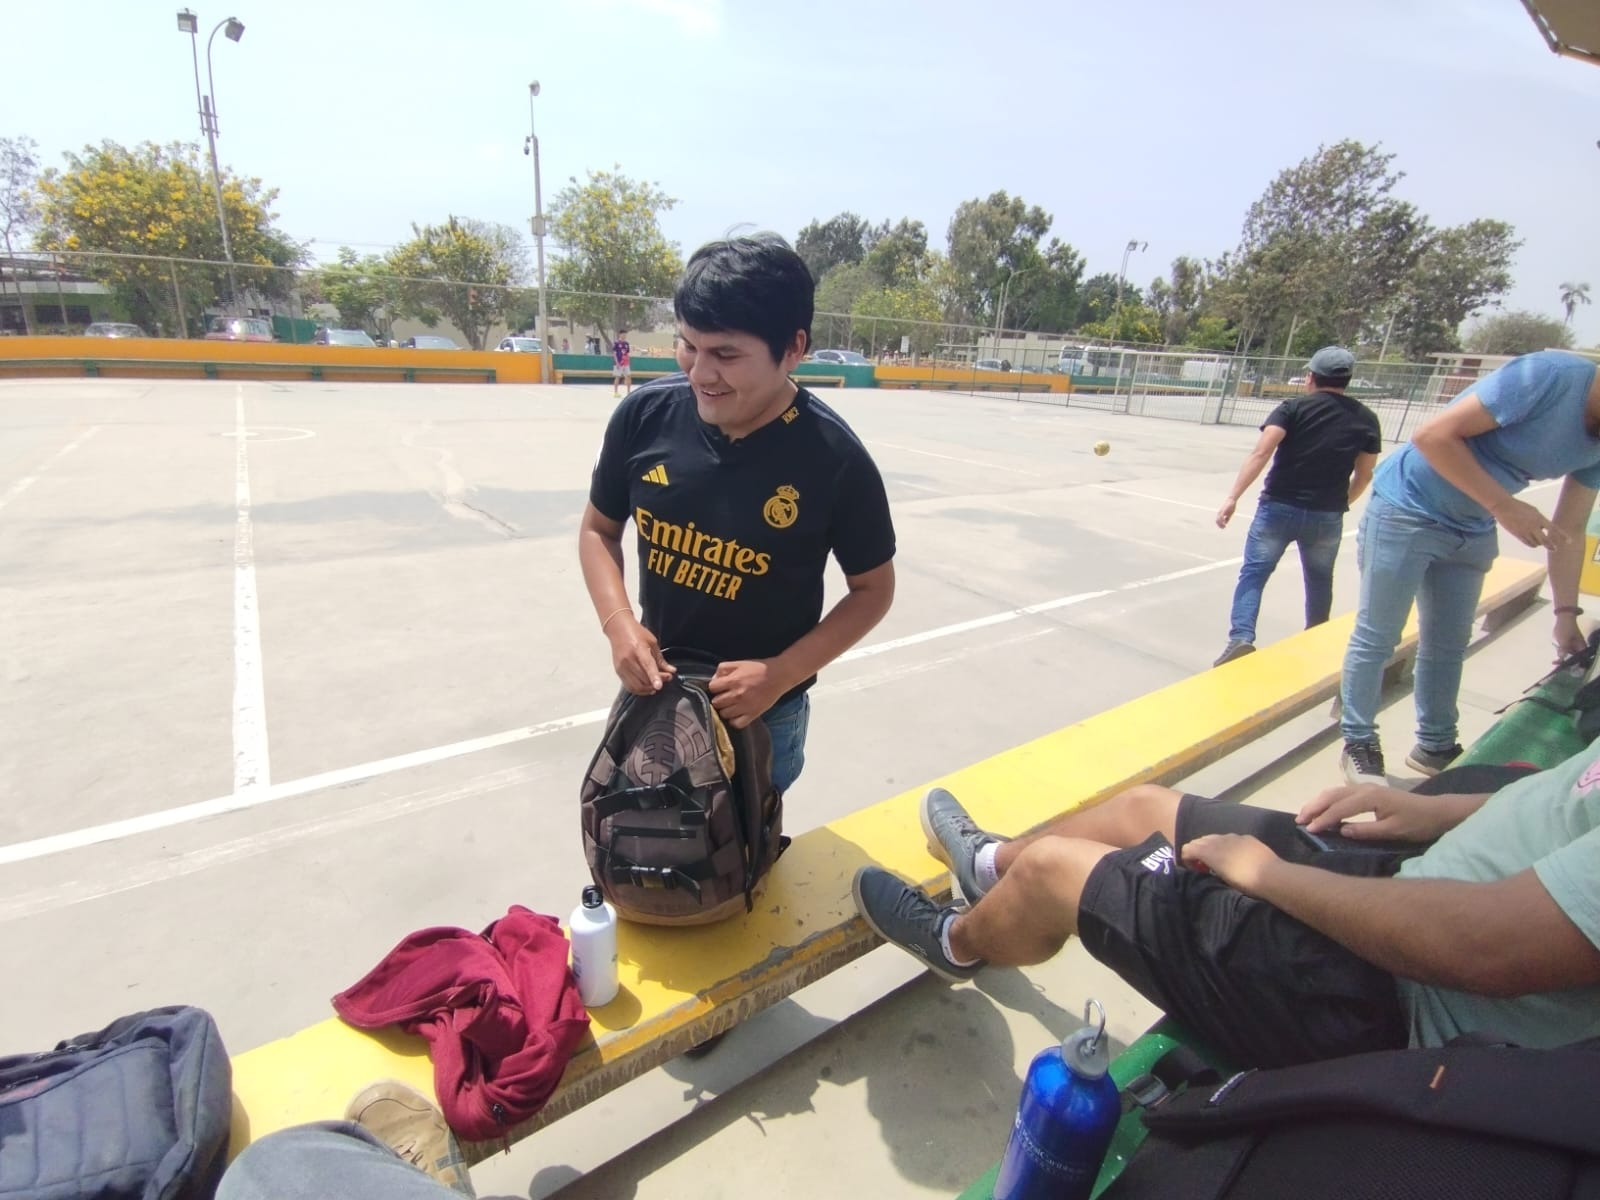